In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d msambare/fer2013

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
  0% 0.00/60.3M [00:00<?, ?B/s]
100% 60.3M/60.3M [00:00<00:00, 1.35GB/s]


In [7]:
import zipfile
zipfile_ref=zipfile.ZipFile('/content/fer2013.zip','r')
zipfile_ref.extractall('/content')
zipfile_ref.close()

In [8]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
#Generators
training_dataset=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(48,48)
)
testing_dataset=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(48,48)
)

Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [10]:
#DataAugmentation
datagen=ImageDataGenerator(
    rescale=1/255.,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
train_generator=datagen.flow_from_directory(
    directory='/content/train',
    target_size=(48,48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='sparse'
)
test_generator=datagen.flow_from_directory(
    directory='/content/test',
    target_size=(48,48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='sparse'
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [11]:
#Model making
model=Sequential()

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu',input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(512,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(512,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(7,activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             

 Total params: 5,913,415 (22.56 MB)

 Trainable params: 5,909,575 (22.54 MB)

 Non-trainable params: 3,840 (15.00 KB)

In [12]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [13]:
history=model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


897/898 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2295 - loss: 1.8820

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


898/898 ━━━━━━━━━━━━━━━━━━━━ 59s 50ms/step - accuracy: 0.2296 - loss: 1.8819 - val_accuracy: 0.2491 - val_loss: 1.9559
Epoch 2/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 64s 39ms/step - accuracy: 0.3125 - loss: 1.6989 - val_accuracy: 0.4022 - val_loss: 1.5170
Epoch 3/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 36s 40ms/step - accuracy: 0.4355 - loss: 1.4523 - val_accuracy: 0.4496 - val_loss: 1.4113
Epoch 4/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 36s 40ms/step - accuracy: 0.4879 - loss: 1.3404 - val_accuracy: 0.4661 - val_loss: 1.4219
Epoch 5/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.5156 - loss: 1.2708 - val_accuracy: 0.5254 - val_loss: 1.2495
Epoch 6/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 42s 40ms/step - accuracy: 0.5449 - loss: 1.2061 - val_accuracy: 0.5162 - val_loss: 1.2834
Epoch 7/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 40s 39ms/step - accuracy: 0.5577 - loss: 1.1731 - val_accuracy: 0.4904 - val_loss: 1.2766
Epoch 8/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 36s 40ms/step - accuracy: 0.5745 - loss: 1.1311 - val_accurac

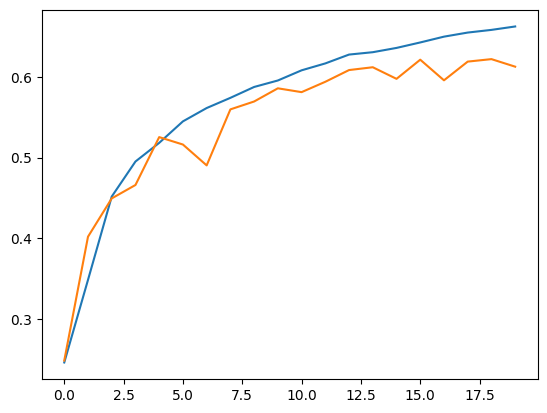

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')

In [15]:
import cv2
def predict(test_img_path):
  path =test_img_path
  true_label = path.split("/")[-2]
  test_img=cv2.imread(test_img_path)
  test_img=cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)
  test_img=cv2.resize(test_img,(48,48))
  test_img=test_img/255.
  test_input=test_img.reshape((1,48,48,1))
  prediction=model.predict(test_input)
  if prediction.argmax(axis=1)[0]==0:
    pred='angry'
  elif prediction.argmax(axis=1)[0]==1:
    pred='disgust'
  elif prediction.argmax(axis=1)[0]==2:
    pred='fear'
  elif prediction.argmax(axis=1)[0]==3:
    pred='happy'
  elif prediction.argmax(axis=1)[0]==4:
    pred='neutral'
  elif prediction.argmax(axis=1)[0]==5:
    pred='sad'
  else:
    pred='surprise'
  print(f'true_label= {true_label} and pred is {pred}')
def process(test_img_path):
  test_img=cv2.imread(test_img_path)
  test_img=cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)
  test_img=cv2.resize(test_img,(48,48))
  test_input=test_img.reshape((1,48,48,1))
  return test_img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
true_label= sad and pred is sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
true_label= sad and pred is neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
true_label= neutral and pred is neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
true_label= fear and pred is angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
true_label= angry and pred is disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
true_label= happy and pred is happy


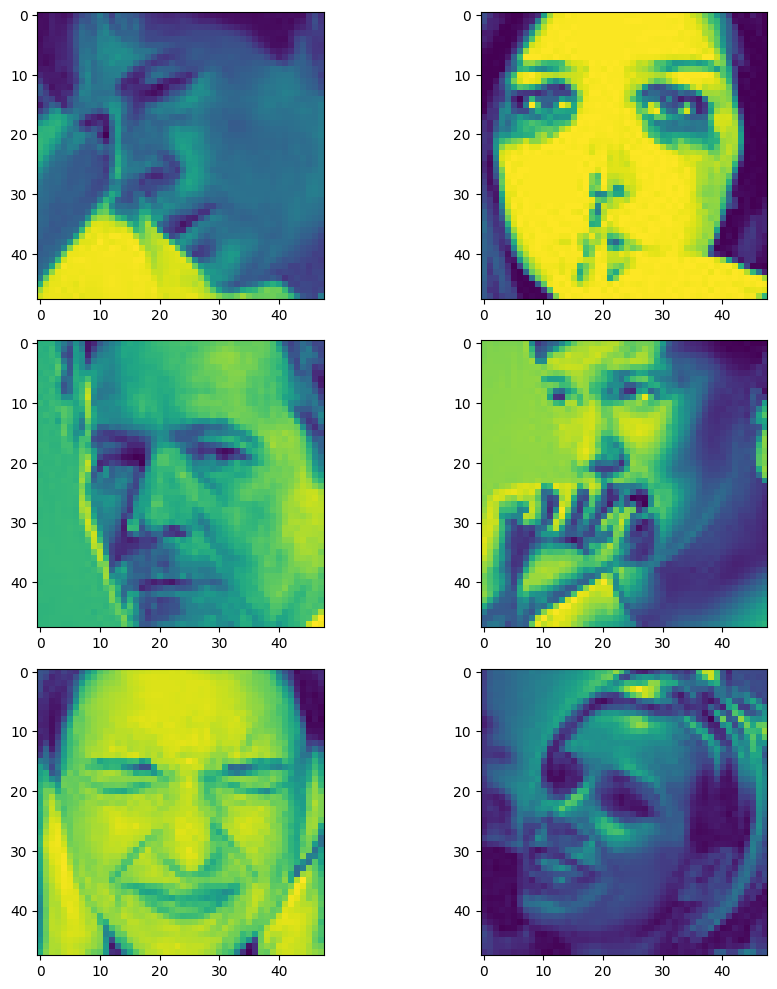

In [17]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes[0,0].imshow(process('/content/test/sad/PrivateTest_11080550.jpg'))
axes[0,0].set_title(predict('/content/test/sad/PrivateTest_11080550.jpg'))
axes[0,1].imshow(process('/content/test/sad/PrivateTest_22791863.jpg'))
axes[0,1].set_title(predict('/content/test/sad/PrivateTest_22791863.jpg'))
axes[1,0].imshow(process('/content/test/neutral/PrivateTest_18263125.jpg'))
axes[1,0].set_title(predict('/content/test/neutral/PrivateTest_18263125.jpg'))
axes[1,1].imshow(process('/content/test/fear/PrivateTest_10629254.jpg'))
axes[1,1].set_title(predict('/content/test/fear/PrivateTest_10629254.jpg'))
axes[2,0].imshow(process('/content/test/angry/PrivateTest_14494003.jpg'))
axes[2,0].set_title(predict('/content/test/angry/PrivateTest_14494003.jpg'))
axes[2,1].imshow(process('/content/test/happy/PrivateTest_12260258.jpg'))
axes[2,1].set_title(predict('/content/test/happy/PrivateTest_12260258.jpg'))
plt.tight_layout()